# CHILDES Age vs Function Word Proportion

In [1]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# List of CSV files to process
function_files_50 = ['Adam_function50.csv', 'Eve_function50.csv', 'Sarah_function50.csv']  # Uses _function50.csv files
function_files_100 = ['Adam_function100.csv', 'Eve_function100.csv', 'Sarah_function100.csv']  # Uses _function100.csv files
function_files_all = ['Adam_function.csv', 'Eve_function.csv', 'Sarah_function.csv']  # Uses _function.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
spearman_rhos_50 = []
spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (they are the only files that have the corresponding ages for each transcript)
age_files = ['Adam_mlu.csv', 'Eve_mlu.csv', 'Sarah_mlu.csv']

In [3]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        months = float(months_and_days[0]) + float(months_and_days[1]) / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [5]:
def age_function_plots(function_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for function_file in function_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(function_file):
            with open(function_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts and their function word proportions
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['Function Word Proportion'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['Function Word Proportion'])))  # Collect age and function word proportion
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Function Word Proportion
            ages = [t[0] for t in chosen_transcripts]
            function_word_proportions = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, function_word_proportions, marker='o')  # scatter plot
            plt.title(f'Age vs Function Word Proportion for {function_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('Function Word Proportion')
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, function_word_proportions)
                spearman_rhos.append([function_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {function_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {function_file}: \n", transcript_list, "\n")
            print(f"Function Word Proportions for {function_file}: \n", function_word_proportions, "\n")  # Print the function word proportions
            print(f"Ages for {function_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {function_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs Function Word Proportion (50 Utterances)

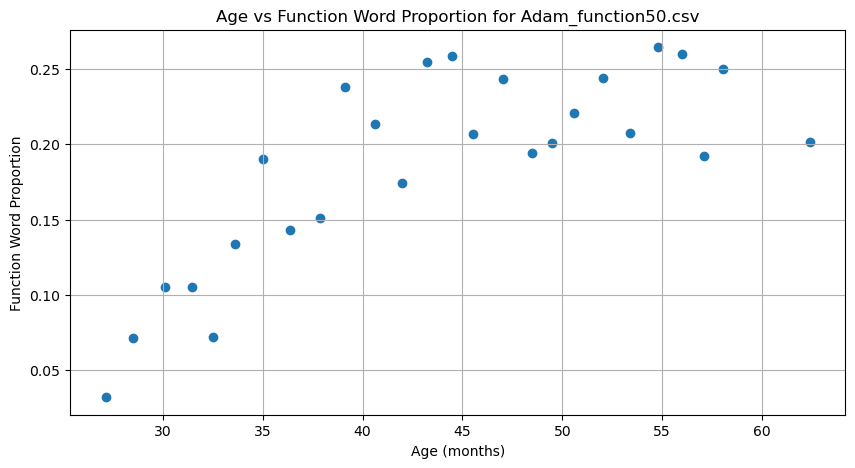

Spearman's rho for Adam_function50.csv: 0.7338

Chosen Transcripts for Adam_function50.csv: 
 ['020304.ipcore.cex', '020415.ipcore.cex', '020603.ipcore.cex', '020714.ipcore.cex', '020816.ipcore.cex', '020918.ipcore.cex', '021030.ipcore.cex', '030011.ipcore.cex', '030126.ipcore.cex', '030304.ipcore.cex', '030418.ipcore.cex', '030529.ipcore.cex', '030707.ipcore.cex', '030814.ipcore.cex', '030916.ipcore.cex', '031101.ipcore.cex', '040014.ipcore.cex', '040115.ipcore.cex', '040217.ipcore.cex', '040401.ipcore.cex', '040511.ipcore.cex', '040624.ipcore.cex', '040729.ipcore.cex', '040902.ipcore.cex', '041002.ipcore.cex', '050212.ipcore.cex'] 

Function Word Proportions for Adam_function50.csv: 
 [0.03184713375796178, 0.07142857142857142, 0.10526315789473684, 0.10526315789473684, 0.0718954248366013, 0.13368983957219252, 0.19, 0.14285714285714285, 0.1507537688442211, 0.23788546255506607, 0.2134387351778656, 0.1743119266055046, 0.2549019607843137, 0.2585551330798479, 0.20717131474103587, 0.2432432

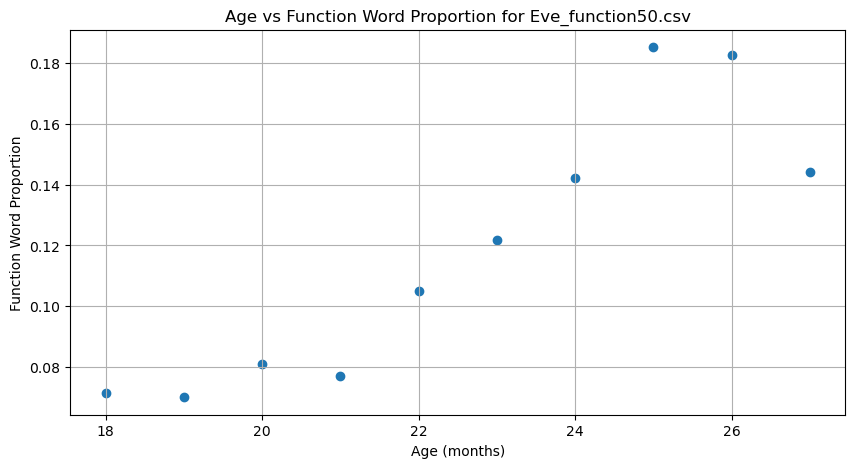

Spearman's rho for Eve_function50.csv: 0.9273

Chosen Transcripts for Eve_function50.csv: 
 ['010600a.ipcore.cex', '010700a.ipcore.cex', '010800.ipcore.cex', '010900a.ipcore.cex', '011000a.ipcore.cex', '011100a.ipcore.cex', '020000a.ipcore.cex', '020100a.ipcore.cex', '020200a.ipcore.cex', '020300a.ipcore.cex'] 

Function Word Proportions for Eve_function50.csv: 
 [0.07142857142857142, 0.07006369426751592, 0.08092485549132948, 0.07692307692307693, 0.105, 0.1218274111675127, 0.14224137931034483, 0.18518518518518517, 0.182648401826484, 0.1440329218106996] 

Ages for Eve_function50.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_function50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



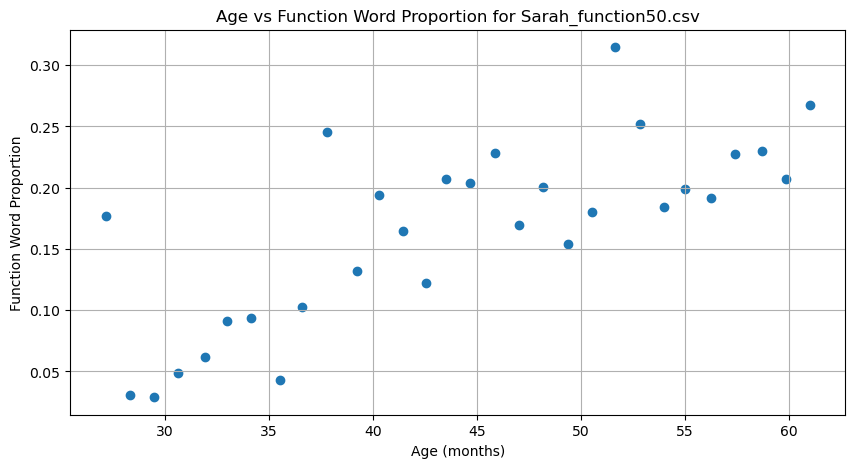

Spearman's rho for Sarah_function50.csv: 0.7375

Chosen Transcripts for Sarah_function50.csv: 
 ['020305.ipcore.cex', '020410.ipcore.cex', '020515.ipcore.cex', '020620.ipcore.cex', '020728.ipcore.cex', '020900.ipcore.cex', '021005.ipcore.cex', '021117.ipcore.cex', '030018a.ipcore.cex', '030124.ipcore.cex', '030307a.ipcore.cex', '030409.ipcore.cex', '030513.ipcore.cex', '030616.ipcore.cex', '030716.ipcore.cex', '030820.ipcore.cex', '030926a.ipcore.cex', '031030.ipcore.cex', '040005.ipcore.cex', '040111.ipcore.cex', '040216.ipcore.cex', '040319.ipcore.cex', '040425.ipcore.cex', '040529.ipcore.cex', '040700.ipcore.cex', '040807.ipcore.cex', '040912.ipcore.cex', '041021.ipcore.cex', '041126.ipcore.cex', '050030.ipcore.cex'] 

Function Word Proportions for Sarah_function50.csv: 
 [0.1773049645390071, 0.030534351145038167, 0.028985507246376812, 0.04861111111111111, 0.06206896551724138, 0.09090909090909091, 0.09340659340659341, 0.043209876543209874, 0.10294117647058823, 0.24553571428571427, 0

In [6]:
age_function_plots(function_files_50, spearman_rhos_50, age_files)

## Age vs Function Word Proportion (100 Utterances)

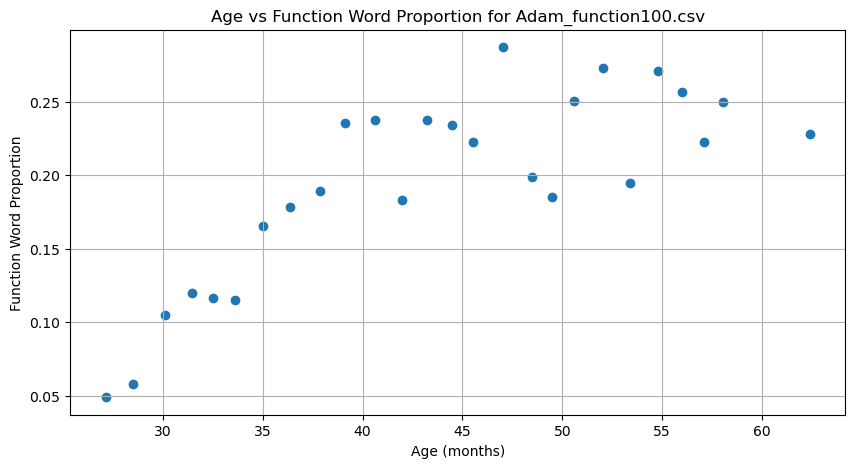

Spearman's rho for Adam_function100.csv: 0.7593

Chosen Transcripts for Adam_function100.csv: 
 ['020304.ipcore-100.cex', '020415.ipcore-100.cex', '020603.ipcore-100.cex', '020714.ipcore-100.cex', '020816.ipcore-100.cex', '020918.ipcore-100.cex', '021030.ipcore-100.cex', '030011.ipcore-100.cex', '030126.ipcore-100.cex', '030304.ipcore-100.cex', '030418.ipcore-100.cex', '030529.ipcore-100.cex', '030707.ipcore-100.cex', '030814.ipcore-100.cex', '030916.ipcore-100.cex', '031101.ipcore-100.cex', '040014.ipcore-100.cex', '040115.ipcore-100.cex', '040217.ipcore-100.cex', '040401.ipcore-100.cex', '040511.ipcore-100.cex', '040624.ipcore-100.cex', '040729.ipcore-100.cex', '040902.ipcore-100.cex', '041002.ipcore-100.cex', '050212.ipcore-100.cex'] 

Function Word Proportions for Adam_function100.csv: 
 [0.04892966360856269, 0.05802047781569966, 0.10465116279069768, 0.11965811965811966, 0.11661807580174927, 0.11528150134048257, 0.16507177033492823, 0.17814726840855108, 0.18888888888888888, 0.23516

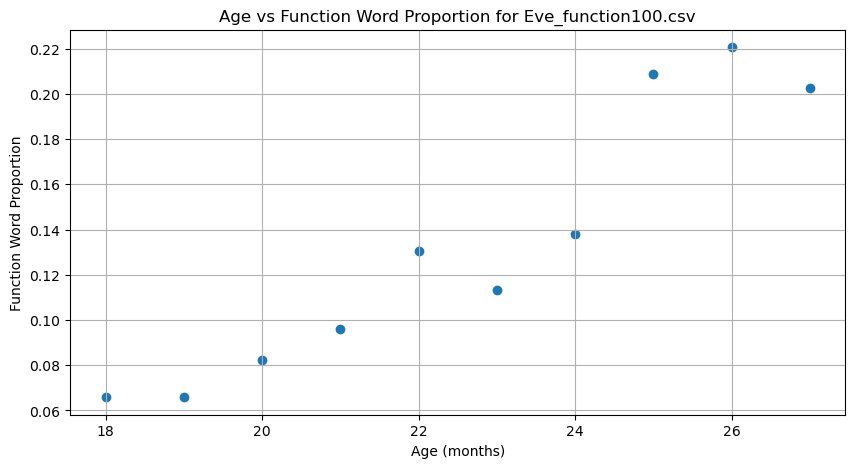

Spearman's rho for Eve_function100.csv: 0.9394

Chosen Transcripts for Eve_function100.csv: 
 ['010600a.ipcore-100.cex', '010700a.ipcore-100.cex', '010800.ipcore-100.cex', '010900a.ipcore-100.cex', '011000a.ipcore-100.cex', '011100a.ipcore-100.cex', '020000a.ipcore-100.cex', '020100a.ipcore-100.cex', '020200a.ipcore-100.cex', '020300a.ipcore-100.cex'] 

Function Word Proportions for Eve_function100.csv: 
 [0.06589147286821706, 0.06583072100313479, 0.08211143695014662, 0.096045197740113, 0.1306532663316583, 0.11335012594458438, 0.1382488479262673, 0.2087912087912088, 0.22065727699530516, 0.2028397565922921] 

Ages for Eve_function100.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_function100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



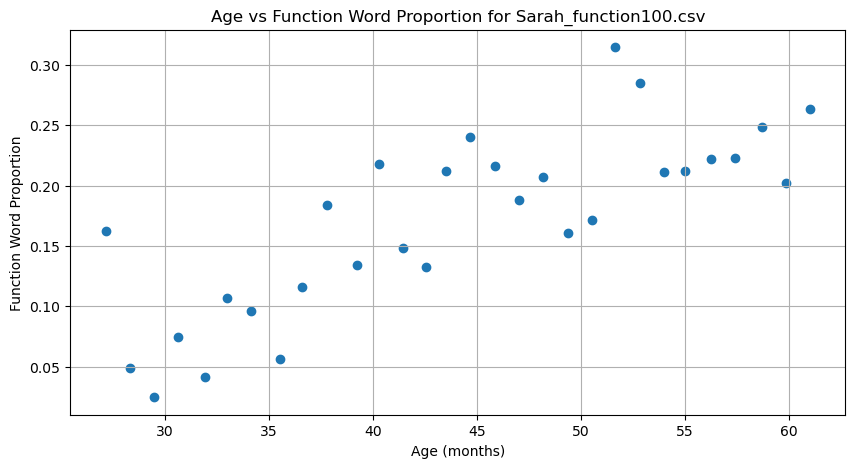

Spearman's rho for Sarah_function100.csv: 0.7953

Chosen Transcripts for Sarah_function100.csv: 
 ['020305.ipcore-100.cex', '020410.ipcore-100.cex', '020515.ipcore-100.cex', '020620.ipcore-100.cex', '020728.ipcore-100.cex', '020900.ipcore-100.cex', '021005.ipcore-100.cex', '021117.ipcore-100.cex', '030018a.ipcore-100.cex', '030124.ipcore-100.cex', '030307a.ipcore-100.cex', '030409.ipcore-100.cex', '030513.ipcore-100.cex', '030616.ipcore-100.cex', '030716.ipcore-100.cex', '030820.ipcore-100.cex', '030926a.ipcore-100.cex', '031030.ipcore-100.cex', '040005.ipcore-100.cex', '040111.ipcore-100.cex', '040216.ipcore-100.cex', '040319.ipcore-100.cex', '040425.ipcore-100.cex', '040529.ipcore-100.cex', '040700.ipcore-100.cex', '040807.ipcore-100.cex', '040912.ipcore-100.cex', '041021.ipcore-100.cex', '041126.ipcore-100.cex', '050030.ipcore-100.cex'] 

Function Word Proportions for Sarah_function100.csv: 
 [0.16201117318435754, 0.048507462686567165, 0.02456140350877193, 0.07432432432432433, 0.041

In [7]:
age_function_plots(function_files_100, spearman_rhos_100, age_files)

## Age vs Function Word Proportion (All Utterances)

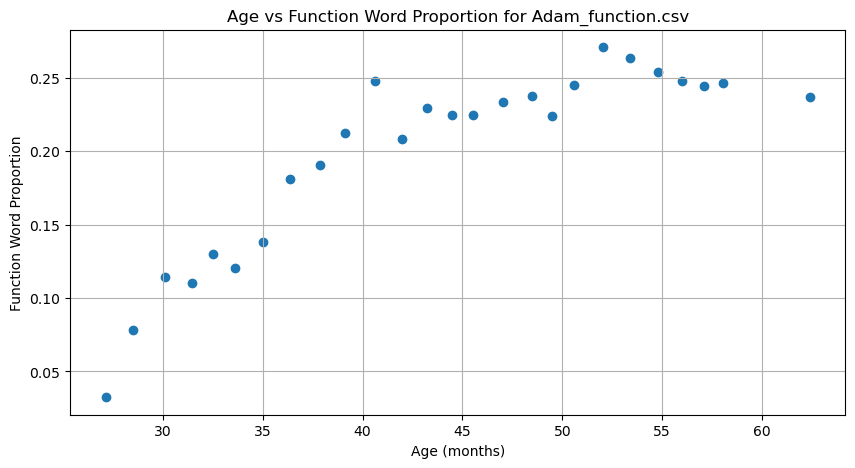

Spearman's rho for Adam_function.csv: 0.8790

Chosen Transcripts for Adam_function.csv: 
 ['020304.cha', '020415.cha', '020603.cha', '020714.cha', '020816.cha', '020918.cha', '021030.cha', '030011.cha', '030126.cha', '030304.cha', '030418.cha', '030529.cha', '030707.cha', '030814.cha', '030916.cha', '031101.cha', '040014.cha', '040115.cha', '040217.cha', '040401.cha', '040511.cha', '040624.cha', '040729.cha', '040902.cha', '041002.cha', '050212.cha'] 

Function Word Proportions for Adam_function.csv: 
 [0.03245591617684641, 0.07789855072463768, 0.11408083441981746, 0.11033478893740903, 0.1300116776956014, 0.1205955334987593, 0.13800236406619384, 0.181287861790442, 0.19060177415487892, 0.21254011355220934, 0.247529525186792, 0.20848422141748577, 0.22958057395143489, 0.2246858832224686, 0.2244402481791206, 0.2337622549019608, 0.23735212685627988, 0.2238478419897586, 0.2453102453102453, 0.27079107505070993, 0.2635396518375242, 0.2538970745248772, 0.24796195652173914, 0.24454783367257923, 

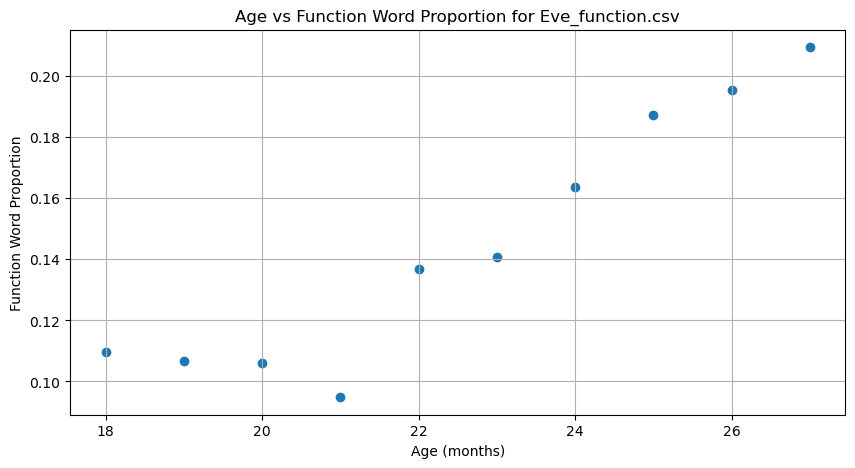

Spearman's rho for Eve_function.csv: 0.8788

Chosen Transcripts for Eve_function.csv: 
 ['010600a.cha', '010700a.cha', '010800.cha', '010900a.cha', '011000a.cha', '011100a.cha', '020000a.cha', '020100a.cha', '020200a.cha', '020300a.cha'] 

Function Word Proportions for Eve_function.csv: 
 [0.10950854700854701, 0.10666666666666667, 0.10590440487347703, 0.09483248154457695, 0.13670886075949368, 0.14084507042253522, 0.16377952755905512, 0.18725868725868725, 0.19538093973984602, 0.20947901591895804] 

Ages for Eve_function.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



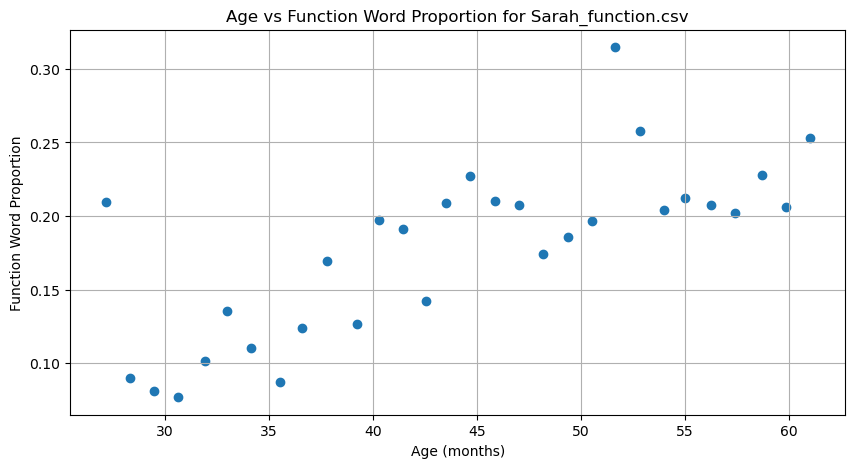

Spearman's rho for Sarah_function.csv: 0.7148

Chosen Transcripts for Sarah_function.csv: 
 ['020305.cha', '020410.cha', '020515.cha', '020620.cha', '020728.cha', '020900.cha', '021005.cha', '021117.cha', '030018a.cha', '030124.cha', '030307a.cha', '030409.cha', '030513.cha', '030616.cha', '030716.cha', '030820.cha', '030926a.cha', '031030.cha', '040005.cha', '040111.cha', '040216.cha', '040319.cha', '040425.cha', '040529.cha', '040700.cha', '040807.cha', '040912.cha', '041021.cha', '041126.cha', '050030.cha'] 

Function Word Proportions for Sarah_function.csv: 
 [0.20958083832335328, 0.09003601440576231, 0.08132147395171538, 0.07686832740213523, 0.1011764705882353, 0.13554987212276215, 0.11000827129859388, 0.08712984054669703, 0.12389380530973451, 0.1695852534562212, 0.12686567164179105, 0.19745222929936307, 0.19095092024539878, 0.14220183486238533, 0.20912547528517111, 0.22746781115879827, 0.21028466483011937, 0.20740103270223753, 0.17406143344709898, 0.1854082998661312, 0.1966403162

In [8]:
age_function_plots(function_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [9]:
spearman_rhos_50

[['Adam_function50.csv', 0.7338006604083994],
 ['Eve_function50.csv', 0.9272727272727272],
 ['Sarah_function50.csv', 0.7374860956618465]]

In [10]:
spearman_rhos_100

[['Adam_function100.csv', 0.7593162393162393],
 ['Eve_function100.csv', 0.9393939393939393],
 ['Sarah_function100.csv', 0.7953281423804226]]

In [11]:
spearman_rhos_all

[['Adam_function.csv', 0.8789743589743589],
 ['Eve_function.csv', 0.8787878787878788],
 ['Sarah_function.csv', 0.7147942157953281]]